# Explore here

In [3]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv


# load the .env file variables
load_dotenv()

# 1) Connect to the database here using the SQLAlchemy's create_engine function

# 2) Execute the SQL sentences to create your tables using the SQLAlchemy's execute function

# 3) Execute the SQL sentences to insert your data using the SQLAlchemy's execute function

# 4) Use pandas to print one of the tables as dataframes using read_sql function

True

In [29]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

radiohead_uri = 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))
results = spotify.artist_top_tracks(radiohead_uri)
print(results)



{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'}, 'href': 'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb', 'id': '4Z8W4fKeB5YxbusRsdQVPb', 'name': 'Radiohead', 'type': 'artist', 'uri': 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/3gBVdu4a1MMJVMy6vwPEb8'}, 'href': 'https://api.spotify.com/v1/albums/3gBVdu4a1MMJVMy6vwPEb8', 'id': '3gBVdu4a1MMJVMy6vwPEb8', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273df55e326ed144ab4f5cecf95', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02df55e326ed144ab4f5cecf95', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851df55e326ed144ab4f5cecf95', 'width': 64}], 'is_playable': True, 'name': 'Pablo Honey', 'release_date': '1993-02-22', 'release_date_precision': 'day', 'total_tracks': 12, 'type': 'album', 'uri

In [30]:

tracks = []
for track in results['tracks']:
    tracks.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration' : track['duration_ms']
    })


tracks_df = pd.DataFrame(tracks)
tracks_df = tracks_df.sort_values(by='popularity')

print(tracks_df.head(10))


                        name  popularity  duration
9                 All I Need          74    228746
5                       Just          75    234800
6         Fake Plastic Trees          75    290706
7      Weird Fishes/ Arpeggi          75    318186
8    Exit Music (For A Film)          75    267186
4  Jigsaw Falling Into Place          78    248893
3               High and Dry          79    257480
2               Karma Police          81    264066
1               No Surprises          85    229120
0                      Creep          89    238640


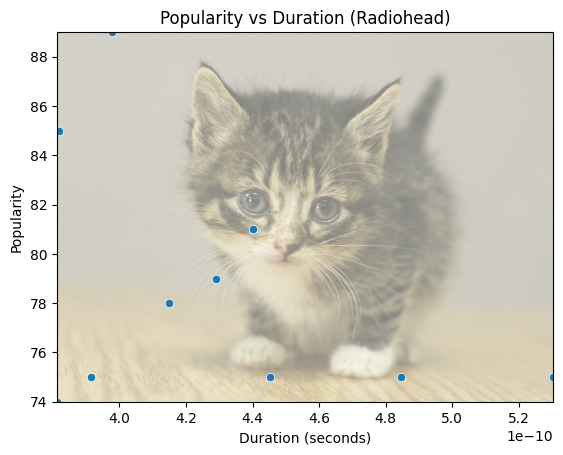

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

tracks_df = tracks_df.sort_values(by='popularity')
tracks_df['duration'] = tracks_df['duration'] / 60000


# background image :3
bg_image = plt.imread('cute_kitty.jpg')
plt.imshow(bg_image, aspect='auto', extent=(tracks_df['duration'].min(), tracks_df['duration'].max(), tracks_df['popularity'].min(), tracks_df['popularity'].max()), zorder=0, alpha=0.5)

sns.scatterplot(data=tracks_df, x='duration', y='popularity')
plt.title('Popularity vs Duration (Radiohead)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Popularity')
plt.show()

As can be seen, there is no direct relationship between the length of the song and its popularity.